In [37]:
import math, random, os, datetime, requests, zipfile, io
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf


#https://data.binance.vision/?prefix=data/spot/daily/klines/BTCUSDT/1h/

2025-05-13 17:08:19.956343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747145300.063898   59973 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747145300.102876   59973 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747145300.283207   59973 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747145300.283374   59973 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747145300.283379   59973 computation_placer.cc:177] computation placer alr

In [3]:
start_date_str = "2017-08-17"
end_date_str = "2025-05-12"
dataset_path = "dataset/crypto_prices/"

start_date = datetime.date.fromisoformat(start_date_str)
end_date = datetime.date.fromisoformat(end_date_str)

# Calculate the number of days between start and end date
delta = end_date - start_date

# Loop over each day in the date range
for i in range(delta.days + 1):
    current_date = start_date + datetime.timedelta(days=i)
    date_str = current_date.strftime('%Y-%m-%d')
    csv_file_name = f"BTCUSDT-1h-{date_str}.csv"
    csv_file_path = os.path.join(dataset_path, csv_file_name)
    
    # Skip if the CSV file already exists
    if os.path.exists(csv_file_path):
        print(f"{csv_file_name} already exists, skipping.")
        continue
    
    # Construct the correct URL for the ZIP file
    file_name = f"BTCUSDT-1h-{date_str}.zip"
    url = f"https://data.binance.vision/data/spot/daily/klines/BTCUSDT/1h/{file_name}"
    print(f"Downloading {file_name}...")
    
    # Download the ZIP file
    response = requests.get(url)
    
    if response.status_code == 200:
        try:
            # Process the ZIP file in memory and extract contents
            with io.BytesIO(response.content) as zip_buffer:
                with zipfile.ZipFile(zip_buffer) as zip_file:
                    zip_file.extractall(dataset_path)
            print(f"Extracted {file_name}")
        except zipfile.BadZipFile:
            print(f"Bad ZIP file for {date_str}")
    else:
        print(f"File not found for {date_str}")

Extracted BTCUSDT-1h-2017-08-17.zip
Extracted BTCUSDT-1h-2017-08-18.zip
Extracted BTCUSDT-1h-2017-08-19.zip
Extracted BTCUSDT-1h-2017-08-20.zip
Extracted BTCUSDT-1h-2017-08-21.zip
Extracted BTCUSDT-1h-2017-08-22.zip
Extracted BTCUSDT-1h-2017-08-23.zip
Extracted BTCUSDT-1h-2017-08-24.zip
Extracted BTCUSDT-1h-2017-08-25.zip
Extracted BTCUSDT-1h-2017-08-26.zip
Extracted BTCUSDT-1h-2017-08-27.zip
Extracted BTCUSDT-1h-2017-08-28.zip
Extracted BTCUSDT-1h-2017-08-29.zip
Extracted BTCUSDT-1h-2017-08-30.zip
Extracted BTCUSDT-1h-2017-08-31.zip
Extracted BTCUSDT-1h-2017-09-01.zip
Extracted BTCUSDT-1h-2017-09-02.zip
Extracted BTCUSDT-1h-2017-09-03.zip
Extracted BTCUSDT-1h-2017-09-04.zip
Extracted BTCUSDT-1h-2017-09-05.zip
Extracted BTCUSDT-1h-2017-09-06.zip
Extracted BTCUSDT-1h-2017-09-07.zip
Extracted BTCUSDT-1h-2017-09-08.zip
Extracted BTCUSDT-1h-2017-09-09.zip
Extracted BTCUSDT-1h-2017-09-10.zip
Extracted BTCUSDT-1h-2017-09-11.zip
Extracted BTCUSDT-1h-2017-09-12.zip
Extracted BTCUSDT-1h-2017-09

In [5]:
# Create a list to store DataFrames
dfs = []

for i in range(delta.days + 1):
    current_date = start_date + datetime.timedelta(days=i)
    date_str = current_date.strftime('%Y-%m-%d')
    file_name = f"BTCUSDT-1h-{date_str}.csv"
    file_path = os.path.join(dataset_path, file_name)
    
    # Check if file exists
    if os.path.exists(file_path):
        try:
            # Read CSV file
            df = pd.read_csv(file_path, header=None)
            dfs.append(df)
            print(f"Processed {file_name}")
        except Exception as e:
            print(f"Error reading {file_name}: {e}")
    else:
        print(f"File {file_name} not found, skipping.")

if not dfs:
    print("No files found to concatenate.")

# Concatenate all DataFrames
concatenated_df = pd.concat(dfs, ignore_index=True)

# Save to CSV without header
concatenated_df.to_csv(dataset_path + "btc_prices_history.csv", index=False, header=False)
print(f"Concatenated CSV saved")

Processed BTCUSDT-1h-2017-08-17.csv
Processed BTCUSDT-1h-2017-08-18.csv
Processed BTCUSDT-1h-2017-08-19.csv
Processed BTCUSDT-1h-2017-08-20.csv
Processed BTCUSDT-1h-2017-08-21.csv
Processed BTCUSDT-1h-2017-08-22.csv
Processed BTCUSDT-1h-2017-08-23.csv
Processed BTCUSDT-1h-2017-08-24.csv
Processed BTCUSDT-1h-2017-08-25.csv
Processed BTCUSDT-1h-2017-08-26.csv
Processed BTCUSDT-1h-2017-08-27.csv
Processed BTCUSDT-1h-2017-08-28.csv
Processed BTCUSDT-1h-2017-08-29.csv
Processed BTCUSDT-1h-2017-08-30.csv
Processed BTCUSDT-1h-2017-08-31.csv
Processed BTCUSDT-1h-2017-09-01.csv
Processed BTCUSDT-1h-2017-09-02.csv
Processed BTCUSDT-1h-2017-09-03.csv
Processed BTCUSDT-1h-2017-09-04.csv
Processed BTCUSDT-1h-2017-09-05.csv
Processed BTCUSDT-1h-2017-09-06.csv
Processed BTCUSDT-1h-2017-09-07.csv
Processed BTCUSDT-1h-2017-09-08.csv
Processed BTCUSDT-1h-2017-09-09.csv
Processed BTCUSDT-1h-2017-09-10.csv
Processed BTCUSDT-1h-2017-09-11.csv
Processed BTCUSDT-1h-2017-09-12.csv
Processed BTCUSDT-1h-2017-09

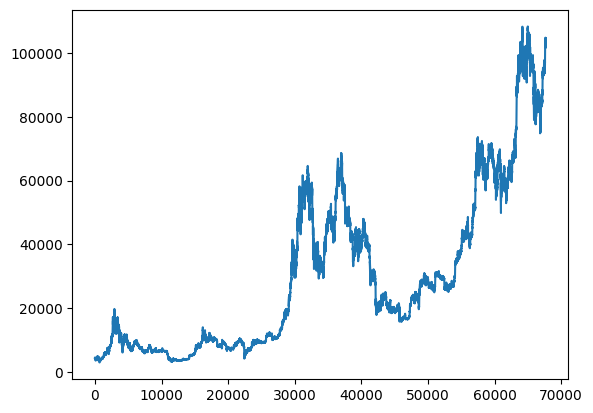

In [31]:

headers = [
    "open_time", "open", "high", "low", "close", "volume",
    "close_time", "quote_asset_volume", "number_of_trades",
    "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
]
dataset = pd.read_csv("../../datasets/crypto_prices/btc_prices_history.csv", names=headers)

plt.plot(dataset["close"], label="BTCUSDT")
plt.show()

In [75]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# dataset_scaled = scaler.fit_transform(dataset["close"].values.reshape(-1,1))
#dataset_scaled = dataset["close"].values


window_size = 30

# Calculate global mean and std for initial points
global_mean = dataset['close'].mean()
global_std = dataset['close'].std()

# Calculate rolling mean and std using past data only (shifted by 1)
rolling_mean = dataset['close'].shift(1).rolling(window=window_size, min_periods=2).mean()
rolling_std = dataset['close'].shift(1).rolling(window=window_size, min_periods=2).std()

# Fill NaN values with global mean and std for initial points
rolling_mean_filled = rolling_mean.fillna(global_mean)
rolling_std_filled = rolling_std.fillna(global_std)

# Scale the data
dataset_scaled = (dataset['close'] - rolling_mean_filled) / rolling_std_filled

# Convert to numpy array to match your original output shape
dataset_scaled = dataset_scaled.values.reshape(-1,1)


train_size = int(len(dataset_scaled) * 0.8)
x_train, x_test = dataset_scaled[:train_size], dataset_scaled[train_size:]

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        try:
            X.append(data[i:i + seq_length])  # Sequence of seq_length prices
            y.append(data[i + seq_length])   # Next price
        except Exception as e:
            pass
    return np.array(X), np.array(y)

seq_length = 30
X_train, y_train = create_sequences(x_train, seq_length)
X_test, y_test = create_sequences(x_test, seq_length)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=100, input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu')
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=5)



Epoch 1/5
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - loss: 1.5390
Epoch 2/5
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - loss: 1.4969
Epoch 3/5
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - loss: 1.4750
Epoch 4/5
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - loss: 1.4789
Epoch 5/5
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - loss: 1.5231


In [59]:
evaluate = model.evaluate(X_test, y_test)

print("evaluate:", evaluate)

401/401 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 1.4196e-05
evaluate: 2.6596786483423784e-05


423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
<class 'numpy.ndarray'>


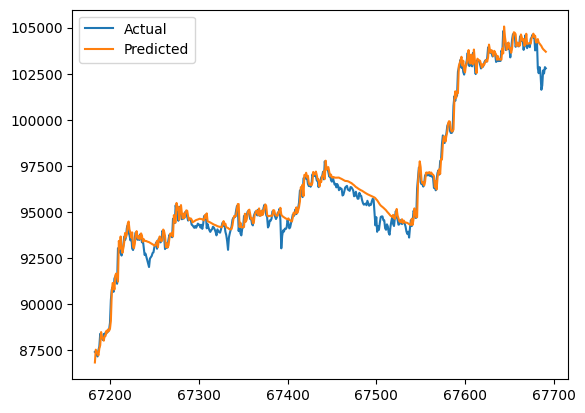

In [ ]:
predictions = model.predict(X_test)

def inverse_transform_rolling(predictions, rolling_mean, rolling_std, start_index):

    # Calculate the indices for the predictions
    indices = np.arange(start_index, start_index + len(predictions))
    # Inverse transform: (scaled * rolling_std) + rolling_mean
    original_predictions = (predictions.flatten() * rolling_std[indices]) + rolling_mean[indices]
    return original_predictions

test_start = train_size + seq_length

predictions_original = inverse_transform_rolling(predictions, rolling_mean_filled, rolling_std_filled, test_start)
y_test_original = inverse_transform_rolling(y_test, rolling_mean_filled, rolling_std_filled, test_start)

# Now you can plot or use the predictions in the original scale
plt.plot(y_test_original[13000:], label='Actual')
plt.plot(predictions_original[13000:], label='Predicted')
plt.legend()
plt.show()

In [88]:

predicted_count = 100
# Get the last sequence from X_test (normalized)
last_sequence = X_test[-1]  # Shape: [seq_length, 1]

# Initialize list to store predictions
future_predictions = []

# Predict 100 future prices
current_sequence = last_sequence.copy()  # Shape: [seq_length, 1]
for _ in range(predicted_count):
    # Reshape for model input: [1, seq_length, 1]
    current_sequence_reshaped = current_sequence.reshape(1, seq_length, 1)
    
    # Predict the next price (normalized)
    next_pred = model.predict(current_sequence_reshaped, verbose=0)  # Shape: [1, 1]
    
    # Append prediction to results
    future_predictions.append(next_pred[0, 0])
    
    # Update the sequence: remove oldest price, append new prediction
    current_sequence = np.roll(current_sequence, -1, axis=0)  # Shift left
    current_sequence[-1] = next_pred  # Add new prediction

# Convert predictions to numpy array and inverse-transform to original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)


window_size = 30

# Calculate global mean and std for initial points
global_mean = future_predictions.mean()
global_std = future_predictions.std()

# Calculate rolling mean and std using past data only (shifted by 1)
rolling_mean = future_predictions.shift(1).rolling(window=window_size, min_periods=2).mean()
rolling_std = future_predictions.shift(1).rolling(window=window_size, min_periods=2).std()

# Fill NaN values with global mean and std for initial points
rolling_mean_filled = rolling_mean.fillna(global_mean)
rolling_std_filled = rolling_std.fillna(global_std)

# Scale the data
future_predictions_scaled = (future_predictions - rolling_mean_filled) / rolling_std_filled


future_predictions_original = inverse_transform_rolling(future_predictions_scaled, rolling_mean_filled, rolling_std_filled, test_start)

# Print or use the predictions
print("Predicted 100 future prices (original scale):")
print(future_predictions_original)


plt.plot(y_test_original, label='Actual Test Prices')
plt.plot(range(len(y_test_original), len(y_test_original) + predicted_count), future_predictions_original, label='Predicted Future Prices')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'shift'